# MVP - PUC_RIO - Engenharia de Dados
- **Curso Ciência de Dados e Analytics - Abril/2025**

  - Aluno:      Fabio Nunes Martins. 
  - Professor:  Victor Almeida
  - Professor:  Jose Boaro

#1 - Objetivo



Este MVP visa disponibilizar uma análise de dados para apoiar as decisões gerencias sobre a performance de uma equipe de suporte espalhada em diversos escritórios em países diferentes. Essas equipes tratam Tickets de Incidentes com Prioridades (Low, Moderate, High e Critical ).
Para cada tipo de Prioridade existe um SLA ( Service Level Agreement), que limita o tempo máximo para a resolução de cada ticket de Incidente criado.

Este estudo ajudara na renovação do contrato e readequação da equipe.


Baseado nisso, esse MVP tem como objetivo responder as seguintes perguntas:
 
 **P1** – Qual é o número de Tickets/países (locations), em que os Incidentes NÃO foram atendidos dentro do prazo estimado por sua Prioridade?

 **P2** – Qual é o número de Tickets/países (locations), em que os Incidentes FORAM atendidos dentro do prazo estimado por sua Prioridade?

 **P3** – Qual é o número de Tickets/mês, em que os Incidentes NÃO foram atendidos dentro do prazo estimado por sua Prioridade?

 **P4** – Qual é o número de Tickets/mês, em que os Incidentes FORAM atendidos dentro do prazo estimado por sua Prioridade?


#2 - Coleta dos Dados

Origem dos dados: 
- incident_event_log.csv - Kraggle - https://www.kaggle.com/datasets/shamiulislamshifat/it-incident-log-dataset
- incident_location_log.csv - Dado montado manualmente.

O arquivo **incident_event_log.csv** foi baixado manualmente do site https://www.kaggle.com/datasets/shamiulislamshifat/it-incident-log-dataset . Esse dataset foi ecolhido porque **não contém dados sensíveis** que identifiquem empresas ou pessoas reais.

Uma vez baixado, foi feito o upload dos arquivos _incident_event_log.csv_ e _incident_location_log.csv_  na **NUVEM**. Os arquivos foram armazenados no **DBFS** do **Databricks** conforme podemos ver ne evidencia abaixo:


.

<img src="https://raw.githubusercontent.com/Tirrenus/PUC-RIO_Eng_Dados-MVP/main/img/DBFS_CSVs.png" style="width:200px;height:200px;">

In [0]:
from IPython.display import Image, display

# URL da imagem em versão raw do GitHub
image_url = "https://raw.githubusercontent.com/Tirrenus/PUC-RIO_Eng_Dados-MVP/main/img/DBFS_CSVs.png"

# Exibe a imagem no notebook
display(Image(url=image_url))

# 4 - Modelagem




Para a análise dos dados do problema proposto, optei pelo esquema Multidimensional  ESTRELA (Data Warehouse). Contando com uma tabela FATO e uma tabela DIMENSÃO.

Abaixo o modelo de dados baseado na Camada GOLD:

.

<img src="https://raw.githubusercontent.com/Tirrenus/PUC-RIO_Eng_Dados-MVP/main/img/Modelo_de_Dados.png" style="width:42px;height:42px;">

#5 - Catalogos de Dados

### 5.1 - Catalogo - Camada BRONZE



**incident_event_log.csv** 

<img src="https://raw.githubusercontent.com/Tirrenus/PUC-RIO_Eng_Dados-MVP/main/img/tabela_location.png" style="width:42px;height:42px;" class="center">




**incident_location_log.csv**

<img src="https://raw.githubusercontent.com/Tirrenus/PUC-RIO_Eng_Dados-MVP/main/img/tabela_incident_Bronze.png" style="width:42px;height:42px;" class="center">





### 5.2 - Catalogo - Camada SILVER




**Tabela = inc_silver.location**

<img src="https://raw.githubusercontent.com/Tirrenus/PUC-RIO_Eng_Dados-MVP/main/img/tabela_location.png" style="width:42px;height:42px;">




**Tabela = inc_silver.incident**

<img src="https://raw.githubusercontent.com/Tirrenus/PUC-RIO_Eng_Dados-MVP/main/img/tabela_incident_Silver.png" style="width:42px;height:42px;">





### 5.3 - Catalogo - Camada  Gold








**Tabela = inc_gold.location** 

<img src="https://raw.githubusercontent.com/Tirrenus/PUC-RIO_Eng_Dados-MVP/main/img/tabela_location.png" style="width:42px;height:42px;">




**Tabela = inc_gold.incident**

<img src="https://raw.githubusercontent.com/Tirrenus/PUC-RIO_Eng_Dados-MVP/main/img/tabela_incident_Gold.png" style="width:42px;height:42px;">





#6 - Carga dos Dados
As carga dos dados foram feitas em etapas durante a implementação das diferentes camadas de dados apresentadas no decorre do Pipeline.


Abaixo, podemos ver em qual item do Pipeline as carga foram feitas e executadas com sucesso:
- **_Camada Bronze_**

    - A carga dos dados foi feita a partir do dataset en formato .CSV a um dataframe PySpark e na sequerncia na base de dados **INC_BRONZE**.
    - Evidencias no  item _**( 7.1.3 )**_  deste Notebook.


- **_Camada Silver_** 

    - A carga dos dados foi feita a partir do dataset em ormato .CSV a um dataframe PySpark, algumas transformações foram feitas e na sequerncia na base de dados **INC_SILVER**.
    - Evidencias no  item _**( 7.2.4 )**_  deste Notebook.
  
- **_Camada Gold_**
    
     - A carga dos dados foi feita a partir do dataset em ormato .CSV a um dataframe PySpark, algumas transformações foram feitas e na sequerncia na base de dados **INC_GOLD**
     - Evidencias no item  _**( 7.3.2 )**_   deste Notebook.

# 7 - Pipeline de Dados - ETL

## 7.1 - **BRONZE** - Base de Dados - (141712 rows) 



###7.1.3 - Carga de Dados BRONZE

In [0]:
### Import de Bibliotecas e  Dados

# Import
from pyspark.sql.functions import *
from pyspark.sql.types import *

# Read CSV File
incident_df = spark.read.csv("/FileStore/tables/incident_event_log.csv", inferSchema=True, header=True)
location_df = spark.read.csv("/FileStore/tables/incident_location_log.csv", inferSchema=True, header=True)

In [0]:
### Verificação de Dados - Incident
incident_df.show(5)

+----------+--------------+------+------------------+------------+-------------+--------+-----------+--------------+---------------+--------------+---------------+--------------+---------------+------------+------------+-----------+---------------+-----------+-------+----------+----------+------------+----------------+-----------+---------+-----------------------+-------------+----------+---+------+---------+-----------+---------------+---------------+--------------+
|    number|incident_state|active|reassignment_count|reopen_count|sys_mod_count|made_sla|  caller_id|     opened_by|      opened_at|sys_created_by| sys_created_at|sys_updated_by| sys_updated_at|contact_type|    location|   category|    subcategory|  u_symptom|cmdb_ci|    impact|   urgency|    priority|assignment_group|assigned_to|knowledge|u_priority_confirmation|       notify|problem_id|rfc|vendor|caused_by|closed_code|    resolved_by|    resolved_at|     closed_at|
+----------+--------------+------+------------------+---

In [0]:
### Verificação de Dados - Location
location_df.show()

+------------+---------+---------+----------+
|    Location|     City|  Country|  TimeZone|
+------------+---------+---------+----------+
|Location 204|Hyderabad|    India|UTC + 5:30|
|Location 108|     Pune|    India|UTC + 5:30|
|Location 161| Camberra|Austrtali|  UTC + 10|
| Location 18|   London|  England|   UTC + 0|
| Location 55|São Paulo|   Brazil|   UTC - 3|
| Location 56| Santiago|    Chile|   UTC - 3|
| Location 93| Montreal|   Canada|   UTC - 4|
+------------+---------+---------+----------+



###7.1.4 - Criando Base de Dados - BRONZE

In [0]:

%sql 
--- Apagando o database "BRONZE" para ser recriado
DROP DATABASE IF EXISTS inc_bronze CASCADE;

In [0]:
%sql 
--- Recriando o database "BRONZE"
CREATE DATABASE inc_bronze;

In [0]:
###  Criação da tabela LOCATION a partir do dataframe
location_df.write.mode("overwrite").saveAsTable("inc_bronze.location")

In [0]:
###  Criação da tabela INCIDENT a partir do dataframe
incident_df.write.mode("overwrite").saveAsTable("inc_bronze.incident")

In [0]:
%sql 
---  Verificação se todas as linhas foram importadas no BD
 select count(1) from inc_bronze.incident --141712

count(1)
141712


In [0]:
%sql 
---Verificação  nos dados  da tabela LOCATION
select * from inc_bronze.location

Location,City,Country,TimeZone
Location 204,Hyderabad,India,UTC + 5:30
Location 108,Pune,India,UTC + 5:30
Location 161,Camberra,Austrtali,UTC + 10
Location 18,London,England,UTC + 0
Location 55,São Paulo,Brazil,UTC - 3
Location 56,Santiago,Chile,UTC - 3
Location 93,Montreal,Canada,UTC - 4


In [0]:
%sql 
---  Verificação  nos dados  da tabela INCIDENT
select * from inc_bronze.incident LIMIT 10

number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
INC0000045,New,true,0,0,0,true,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000045,Resolved,true,0,0,2,true,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000045,Resolved,true,0,0,3,true,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000045,Closed,false,0,0,4,true,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000047,New,true,0,0,0,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,true,1,0,1,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:30,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,true,1,0,2,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:33,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,true,1,0,3,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 804,29/2/2016 11:31,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,true,1,0,4,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 703,29/2/2016 11:32,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,true,1,0,5,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 332,1/3/2016 09:14,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


##7.2 - **SILVER** - Base de Dados - (141712 rows)

In [0]:
###Verificação dos  data types
incident_df.printSchema()


root
 |-- number: string (nullable = true)
 |-- incident_state: string (nullable = true)
 |-- active: boolean (nullable = true)
 |-- reassignment_count: integer (nullable = true)
 |-- reopen_count: integer (nullable = true)
 |-- sys_mod_count: integer (nullable = true)
 |-- made_sla: boolean (nullable = true)
 |-- caller_id: string (nullable = true)
 |-- opened_by: string (nullable = true)
 |-- opened_at: string (nullable = true)
 |-- sys_created_by: string (nullable = true)
 |-- sys_created_at: string (nullable = true)
 |-- sys_updated_by: string (nullable = true)
 |-- sys_updated_at: string (nullable = true)
 |-- contact_type: string (nullable = true)
 |-- location: string (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- u_symptom: string (nullable = true)
 |-- cmdb_ci: string (nullable = true)
 |-- impact: string (nullable = true)
 |-- urgency: string (nullable = true)
 |-- priority: string (nullable = true)
 |-- assignment_gr

###7.2.4 - Carga de Dados - SILVER

In [0]:
###  Convertendo Data Types - STRING to TIMESTAMP
incident_df_Silver = incident_df.withColumn("opened_at_TS", to_timestamp(col("opened_at"), "d/M/yyyy hh:mm"))
incident_df_Silver = incident_df_Silver.withColumn("resolved_at_TS", to_timestamp(col("resolved_at"), "d/M/yyyy hh:mm"))
incident_df_Silver = incident_df_Silver.withColumn("closed_at_TS", to_timestamp(col("closed_at"), "d/M/yyyy hh:mm"))


In [0]:
###  Verificação de Tidpo de Dados 
incident_df_Silver.printSchema()

root
 |-- number: string (nullable = true)
 |-- incident_state: string (nullable = true)
 |-- active: boolean (nullable = true)
 |-- reassignment_count: integer (nullable = true)
 |-- reopen_count: integer (nullable = true)
 |-- made_sla: boolean (nullable = true)
 |-- location: string (nullable = true)
 |-- priority: string (nullable = true)
 |-- resolved_by: string (nullable = true)
 |-- opened_at_TS: timestamp (nullable = true)
 |-- resolved_at_TS: timestamp (nullable = true)
 |-- closed_at_TS: timestamp (nullable = true)



In [0]:
###  Verificação de  campos NULL
incident_df_Silver.filter(col("closed_at").isNull()).show()

+------+--------------+------+------------------+------------+-------------+--------+---------+---------+---------+--------------+--------------+--------------+--------------+------------+--------+--------+-----------+---------+-------+------+-------+--------+----------------+-----------+---------+-----------------------+------+----------+---+------+---------+-----------+-----------+-----------+---------+------------+--------------+------------+
|number|incident_state|active|reassignment_count|reopen_count|sys_mod_count|made_sla|caller_id|opened_by|opened_at|sys_created_by|sys_created_at|sys_updated_by|sys_updated_at|contact_type|location|category|subcategory|u_symptom|cmdb_ci|impact|urgency|priority|assignment_group|assigned_to|knowledge|u_priority_confirmation|notify|problem_id|rfc|vendor|caused_by|closed_code|resolved_by|resolved_at|closed_at|opened_at_TS|resolved_at_TS|closed_at_TS|
+------+--------------+------+------------------+------------+-------------+--------+---------+-----

In [0]:
###  Eliminação de colunas  não necessárias para a análise  -  INCIDENT
incident_df_Silver = incident_df_Silver.drop('sys_mod_count','caller_id','opened_by','sys_created_by','sys_created_at','sys_updated_by','sys_updated_at','contact_type','category','subcategory','u_symptom','cmdb_ci','impact','urgency','assignment_group','assigned_to','knowledge','u_priority_confirmation','notify','problem_id','rfc','vendor','caused_by','closed_code','opened_at','resolved_at','closed_at')
incident_df_Silver.show()

+----------+------------------+------+------------------+------------+--------+------------+------------+---------------+-------------------+-------------------+-------------------+
|    number|    incident_state|active|reassignment_count|reopen_count|made_sla|    location|    priority|    resolved_by|       opened_at_TS|     resolved_at_TS|       closed_at_TS|
+----------+------------------+------+------------------+------------+--------+------------+------------+---------------+-------------------+-------------------+-------------------+
|INC0000045|               New|  true|                 0|           0|    true|Location 143|3 - Moderate|Resolved by 149|2016-02-29 01:16:00|2016-02-29 11:29:00|2016-03-05 00:00:00|
|INC0000045|          Resolved|  true|                 0|           0|    true|Location 143|3 - Moderate|Resolved by 149|2016-02-29 01:16:00|2016-02-29 11:29:00|2016-03-05 00:00:00|
|INC0000045|          Resolved|  true|                 0|           0|    true|Location 14

In [0]:
%sql
---  Apagando o database "SILVER" para ser recriado
 DROP DATABASE IF EXISTS inc_silver CASCADE;

In [0]:
%sql 
--- Recriando o database "SILVER"
CREATE DATABASE inc_silver;

In [0]:
###  Ponto de verificação do DF
incident_df_Silver.show()

+----------+------------------+------+------------------+------------+--------+------------+------------+---------------+-------------------+-------------------+-------------------+
|    number|    incident_state|active|reassignment_count|reopen_count|made_sla|    location|    priority|    resolved_by|       opened_at_TS|     resolved_at_TS|       closed_at_TS|
+----------+------------------+------+------------------+------------+--------+------------+------------+---------------+-------------------+-------------------+-------------------+
|INC0000045|               New|  true|                 0|           0|    true|Location 143|3 - Moderate|Resolved by 149|2016-02-29 01:16:00|2016-02-29 11:29:00|2016-03-05 00:00:00|
|INC0000045|          Resolved|  true|                 0|           0|    true|Location 143|3 - Moderate|Resolved by 149|2016-02-29 01:16:00|2016-02-29 11:29:00|2016-03-05 00:00:00|
|INC0000045|          Resolved|  true|                 0|           0|    true|Location 14

In [0]:
###  Criação da tabela LOCATION a partir do dataframe
location_df.write.mode("overwrite").saveAsTable("inc_silver.location")

In [0]:
###  Criação da tabela INCIDENT a partir do dataframe
incident_df_Silver.write.mode("overwrite").saveAsTable("inc_silver.incident")

In [0]:
%sql  
--- Verificação se todas as linhas foram importadas no BD
select count(1) from inc_silver.incident -- 141712


count(1)
141712


In [0]:
%sql 

---  Verificação  nos dados  da tabela LOCATION
select * from inc_silver.location

Location,City,Country,TimeZone
Location 204,Hyderabad,India,UTC + 5:30
Location 108,Pune,India,UTC + 5:30
Location 161,Camberra,Austrtali,UTC + 10
Location 18,London,England,UTC + 0
Location 55,São Paulo,Brazil,UTC - 3
Location 56,Santiago,Chile,UTC - 3
Location 93,Montreal,Canada,UTC - 4


In [0]:
%sql 
---  Verificação  nos dados  da tabela INCIDENT
select * from inc_silver.incident LIMIT 10

number,incident_state,active,reassignment_count,reopen_count,made_sla,location,priority,resolved_by,opened_at_TS,resolved_at_TS,closed_at_TS
INC0000045,New,true,0,0,true,Location 143,3 - Moderate,Resolved by 149,2016-02-29T01:16:00.000+0000,2016-02-29T11:29:00.000+0000,2016-03-05T00:00:00.000+0000
INC0000045,Resolved,true,0,0,true,Location 143,3 - Moderate,Resolved by 149,2016-02-29T01:16:00.000+0000,2016-02-29T11:29:00.000+0000,2016-03-05T00:00:00.000+0000
INC0000045,Resolved,true,0,0,true,Location 143,3 - Moderate,Resolved by 149,2016-02-29T01:16:00.000+0000,2016-02-29T11:29:00.000+0000,2016-03-05T00:00:00.000+0000
INC0000045,Closed,false,0,0,true,Location 143,3 - Moderate,Resolved by 149,2016-02-29T01:16:00.000+0000,2016-02-29T11:29:00.000+0000,2016-03-05T00:00:00.000+0000
INC0000047,New,true,0,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000
INC0000047,Active,true,1,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000
INC0000047,Active,true,1,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000
INC0000047,Active,true,1,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000
INC0000047,Active,true,1,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000
INC0000047,Active,true,1,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000


In [0]:
%sql 
---  Verificação de Tipos da tabela INCIDENT
desc inc_silver.location

col_name,data_type,comment
Location,string,null
City,string,null
Country,string,null
TimeZone,string,null


##7.3 - **GOLD** - Base de Dados - (24985 rows)

###7.3.2 - Carga de Dados - GOLD

In [0]:
%sql 
---  Apagando o database "GOLD" para ser recriado
DROP DATABASE IF EXISTS inc_gold CASCADE;

In [0]:
%sql 
---   Recriando o database "GOLD"
CREATE DATABASE inc_gold;

In [0]:
###  Transformando o Dataset  -  Removendo linhas inúteis a análise
incident_df_Gold =incident_df_Silver.filter(incident_df_Silver.incident_state=="Closed")

In [0]:
###  Criação da tabela LOCATION a partir do dataframe
location_df.write.mode("overwrite").saveAsTable("inc_gold.location")

In [0]:
###  Criação da tabela INCIDENT a partir do dataframe
incident_df_Gold.write.mode("overwrite").saveAsTable("inc_gold.incident")

In [0]:
%sql 
---  Verificação se todas as linhas foram importadas no BD
 select count(1) from inc_gold.incident -- 24985

count(1)
24985


In [0]:
%sql
--- Verificação de tipos da Tabela location
desc inc_gold.location

col_name,data_type,comment
Location,string,null
City,string,null
Country,string,null
TimeZone,string,null


In [0]:
%sql 
---  Verificação  nos dados  da tabela LOCATION
select * from inc_gold.location

Location,City,Country,TimeZone
Location 204,Hyderabad,India,UTC + 5:30
Location 108,Pune,India,UTC + 5:30
Location 161,Camberra,Austrtali,UTC + 10
Location 18,London,England,UTC + 0
Location 55,São Paulo,Brazil,UTC - 3
Location 56,Santiago,Chile,UTC - 3
Location 93,Montreal,Canada,UTC - 4


In [0]:
%sql 
---  Verificação  nos dados  da tabela INCIDENT
select * from inc_gold.incident LIMIT 10


number,incident_state,active,reassignment_count,reopen_count,made_sla,location,priority,resolved_by,opened_at_TS,resolved_at_TS,closed_at_TS
INC0000045,Closed,false,0,0,true,Location 143,3 - Moderate,Resolved by 149,2016-02-29T01:16:00.000+0000,2016-02-29T11:29:00.000+0000,2016-03-05T00:00:00.000+0000
INC0000047,Closed,false,1,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000
INC0000057,Closed,false,0,0,true,Location 204,3 - Moderate,Resolved by 5,2016-02-29T06:10:00.000+0000,2016-03-01T02:55:00.000+0000,2016-03-06T03:00:00.000+0000
INC0000060,Closed,false,0,0,true,Location 204,3 - Moderate,Resolved by 113,2016-02-29T06:38:00.000+0000,2016-03-02T00:06:00.000+0000,null
INC0000062,Closed,false,1,0,false,Location 93,2 - High,Resolved by 62,2016-02-29T06:58:00.000+0000,null,null
INC0000063,Closed,false,1,0,true,Location 93,3 - Moderate,Resolved by 62,2016-02-29T07:08:00.000+0000,null,null
INC0000064,Closed,false,1,0,true,Location 143,3 - Moderate,Resolved by 71,2016-02-29T07:10:00.000+0000,null,null
INC0000065,Closed,false,6,0,true,Location 108,3 - Moderate,Resolved by 197,2016-02-29T07:38:00.000+0000,null,null
INC0000066,Closed,false,1,0,true,Location 161,3 - Moderate,Resolved by 208,2016-02-29T08:03:00.000+0000,null,null
INC0000067,Closed,false,1,0,true,Location 143,3 - Moderate,Resolved by 215,2016-02-29T08:03:00.000+0000,2016-03-02T11:11:00.000+0000,2016-03-07T00:00:00.000+0000


In [0]:
%sql 
---  Verificação de Tipos da tabela INCIDENT
desc inc_gold.incident

col_name,data_type,comment
number,string,null
incident_state,string,null
active,boolean,null
reassignment_count,int,null
reopen_count,int,null
made_sla,boolean,null
location,string,null
priority,string,null
resolved_by,string,null
opened_at_TS,timestamp,null



Para a análise dos dados do problema proposto, optei pelo esquema Multidimensional  ESTRELA.

# 8 - Análise de Dados


Relembrando o objetivo deste MVP, que visa disponibilizar uma análise de dados para apoiar as decisões gerencias sobre a performance de uma equipe de suporte espalhada em diversos escritórios em países diferentes. Essas equipes tratam Tickets de Incidentes com Prioridades (Low, Moderate, High e Critical ). Para cada tipo de Prioridade existe um SLA ( Service Level Agreement), que limita o tempo máximo para a resolução de cada ticket de Incidente criado.

Este estudo ajudará na renovação do contrato e readequação da equipe.

Para esse estudo, foi coletado um dataset de todos os tickets de Incidentes do período de Fevereiro de 2026 até Fevereiro de 2017.

Durante a análise, vimos que os dados da Camada Silver eram abundantes, porém necessitavam de um processamento para que pudesse proporcionar respostas mais claras e rápidas. Sendo assim, na Camada SILVER, foram feitas remoções e colunas do dataset que não eram relevantes na análise e também a conversão das datas que estava em formado STRING para TIMESTAMP, pois a contagem de tempo é primordial para dar respostas as perguntas postas. Já na camada OURO, muitas linhas com dados repetidos foram removidas para garantir uma melhor **PERFORMANCE** e evitar gastos de recursos de processamento com dados desnecessários.

Análise dos dados foi baseado nas respostas as perguntas postas como objetivo desse MVP e apresentadoas no item **_8.1_**, onde poderemos ver as respostas em formato de SQL Query e em representação GRÁFICA.

.


- **CONCLUSÃO:**

  - Basendo-se nas respostas obtidas no item **_8.1_** deste notebook, a equipe responsável pela renovação de contrato de suporte, deverá se debruçar priomordialmente em rever o dimensionamento da equipes que tratam os tickets de Incidentes que impactam a India, Austrália e Canadá. Além disso, devem reforçar a equipe durante os meses de Março ,Abril e Maio que é quando há o maior volume de ticket a serem resolvidos.

  - Um ponto de atenção importante que surgiu durante a análise é que a equipe responsável pela renovação do contrato de suporte, não somente deve atentar para o dimensionamento das equipes mas também na capacitação, uma vez que a análise demonstrou um número muto expressivo de QUEBRA de SLA.


## 8.1 - Perguntas e respostas

**P1** – Qual é o número de Tickets/países (locations), em que os Incidentes NÃO foram atendidos dentro do prazo estimado por sua Prioridade?

- **RESPOSTA**: Conforme podemos verificar no item _**8.1.1**_ deste notebook, o maior número de tickets que NÃO foram atendidos dentro do prazo estipulado pelo SLA, foram os tickets de incidentes que impactam as localidades da India, Austrália e Canadá. Isso nos leva a crer que se faz necessário verificar se há falta de numero físico de profissionais ou se é falta de experiência dos profissionais responsáveis pela resulução desses tickets de incidentes.

 
**P2** – Qual é o número de Tickets/países (locations), em que os Incidentes FORAM atendidos dentro do prazo estimado por sua Prioridade?

- **RESPOSTA**: Já no item _**8.1.2**_ deste notebook, podemos verificar o maior número de tickets que FORAM  atendidos dentro do prazo estipulado pelo SLA, foram os tickets de incidentes que impactam as localidades da India, Austrália e Canadá. Esse número comparado a resposta a pergunta anterior, nos mostra que a India tem uma relevancia grande na estatística geral. Essa importancia se justificar ao imenso número de habitantes daquele pais.

**P3** – Qual é o número de Tickets/mês, em que os Incidentes NÃO foram atendidos dentro do prazo estimado por sua Prioridade?

- **RESPOSTA**: No item **_8.1.3_** Podemos verificar que os meses Março, Abril e Maio foram os meses onde houve o maior número de tickets de incidentes que NÃO foram tratados dentro do prazo estipulado no SLA.


**P4** – Qual é o número de Tickets/mês, em que os Incidentes FORAM atendidos dentro do prazo estimado por sua Prioridade?

- **REPOSTA**: Já no item  **_8.1.4_** Podemos verificar que os meses Março, Abril e Maio também foram os meses onde houve o maior número de tickets de incidentes que FORAM tratados dentro do prazo estipulado no SLA.



### 8.1.1 - P1 - Estouro de SLA por Pais

In [0]:
%sql select count(i.number) as qte, l.Country from inc_gold.incident i, inc_gold.location l where i.location=l.Location and i.made_sla is false group by  l.Country

qte,Country
2939,India
58,Chile
1185,Austrtali
765,Canada
99,Brazil
24,England


Out[37]: <AxesSubplot:xlabel='Country'>

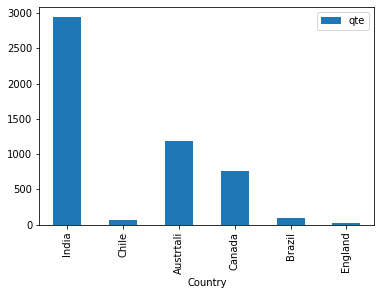

In [0]:
from pyspark.sql import SparkSession
import pandas as pd

query = f"select count(i.number) as qte, l.Country from inc_gold.incident i, inc_gold.location l where i.location=l.Location and i.made_sla is false group by  l.Country"

result = spark.sql(query)
result = result.toPandas()
result.plot(kind='bar', x='Country', y='qte')

### 8.1.2 - P2 - Dentro do SLA por Pais

In [0]:
%sql select count(i.number) as Incidents, l.Country from inc_gold.incident i, inc_gold.location l where i.location=l.Location and i.made_sla is true group by  l.Country

Incidents,Country
4782,India
93,Chile
2824,Austrtali
1170,Canada
144,Brazil
35,England


Out[39]: <AxesSubplot:xlabel='Country'>

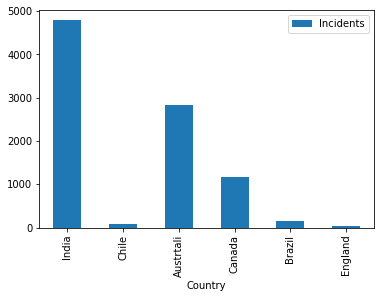

In [0]:
query = f"select count(i.number) as Incidents, l.Country from inc_gold.incident i, inc_gold.location l where i.location=l.Location and i.made_sla is true group by  l.Country"

result = spark.sql(query)
result = result.toPandas()
result.plot(kind='bar', x='Country', y='Incidents')

### 8.1.3 - P3 - Tickets com SLA estourados por mês

In [0]:
%sql
select  count(number) Incidents, MONTH(opened_at_TS) Mes from inc_gold.incident where made_sla is false and opened_at_TS is not null group by MONTH(opened_at_TS) order by Mes ;


Incidents,Mes
18,1
23,2
2968,3
868,4
956,5
2,7
6,8
5,9
7,10
4,11


Out[41]: <AxesSubplot:xlabel='Mes'>

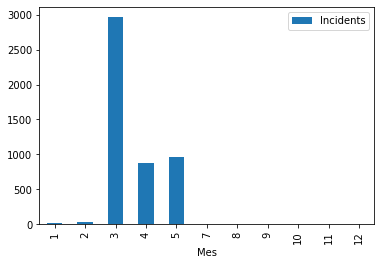

In [0]:
query = f"select  count(number) Incidents, MONTH(opened_at_TS) Mes from inc_gold.incident where made_sla is false and opened_at_TS is not null group by MONTH(opened_at_TS) order by Mes "

result = spark.sql(query)
result = result.toPandas()
result.plot(kind='bar', x='Mes', y='Incidents')

### 8.1.4 - P4 - Tickets com Dentro do SLA por mês

In [0]:
%sql
select  count(number) Incidents, MONTH(opened_at_TS) Mes from inc_gold.incident where made_sla is true and opened_at_TS is not null group by MONTH(opened_at_TS) order by Mes ;


Incidents,Mes
28,1
125,2
2092,3
3525,4
3279,5
3,6
2,7
4,8
5,9
3,10


Out[43]: <AxesSubplot:xlabel='Mes'>

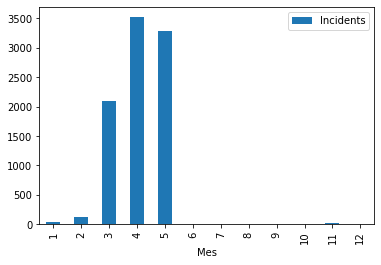

In [0]:
query = f"select  count(number) Incidents, MONTH(opened_at_TS) Mes from inc_gold.incident where made_sla is true and opened_at_TS is not null group by MONTH(opened_at_TS) order by Mes "

result = spark.sql(query)
result = result.toPandas()
result.plot(kind='bar', x='Mes', y='Incidents')

# 9 - Autoavaliação
A escolha do dataset relacionado a Incidentes foi fácil porque eu já estou bastante familiarizado com esse universo. A aquisição do mesmo, foi fácil devido a facilidade que o site  https://www.kaggle.com/  proporciona.

Encontrei bastante dificuldade na transformação das datas que vieram em STRING e que as vezes vinham em formatos para o TIMESTAMP, pois no CSV, as datas vieram com  distintos formatos  d/m/yyyy mm:ss, as vezes dd/m/yyyyy mm:ss e as vezes d/mm/yyyy mm:ss. Foram horas buscando conhecimento para fazer essa conversão usando o Pyspark
Verifiquei que na criação das tabelas do banco de dados alguns dados das colunas referente a DATAS, foram importados no NULL. Acredito que haja algum problema com o TIMESTAMP do Dataframe  x o TIMESTAMP do banco de Dados. Eu ainda estou verificando como revolver esse problema. 

Gostaria de ter proposto mais perguntas, mas devido ao tempo escasso, não foi possível ter mais tempo para aumentar a análise do dataset.

No geral, posso dizer que me sinto bastante satisfeito com o resultado, que apesar de simples, me trouxe bastante conhecimento em técnicas e ferramentas que não conhecia. Este MVP foi bastante desafiador, porém extremamente **PRAZEROSO** de ser feito. Me encorajou a me aprofundar na área de Engenharia de Dados com ainda mais vontade e dedicação.




# 10 -	Principais ferramentas utilizadas:

- Databricks Community
- Apache Spark (PySpark e Spark SQL)
- Python / Pandas
- SQL
